In [1]:
from sqlalchemy import create_engine
import pymysql
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# importing the data from csv file produced after cleaning up the data in task 1
credit_one_clean_data = pd.read_csv('~/data_science_course/course_2/credit_one_v2.csv', header = 0)

In [3]:
credit_one_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  float64
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  int64  
 13  BILL_AMT2                   300

In [4]:
print(credit_one_clean_data.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [5]:
credit_one_clean_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1.0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2.0,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3.0,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4.0,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5.0,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


### Data with dummy features for the character type features

In [7]:
credit_one_w_dummies = pd.get_dummies(credit_one_clean_data)

### Trying map function to create numeric type feature for object type feature

In [8]:
#credit_one_w_dummies.info() Using map to convert sex to numeric
credit_one_clean_data['Gender_numeric'] = credit_one_clean_data.SEX.map({'female':0, 'male':1})

In [9]:
credit_one_clean_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,Gender_numeric
0,1.0,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,0
1,2.0,120000,female,university,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,0
2,3.0,90000,female,university,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,0
3,4.0,50000,female,university,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,0
4,5.0,50000,male,university,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,1


## Few steps to explore the different visualizations

In [11]:
header = credit_one_w_dummies.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female',
       'SEX_male', 'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_other', 'EDUCATION_university',
       'default payment next month_default',
       'default payment next month_not default'],
      dtype='object')


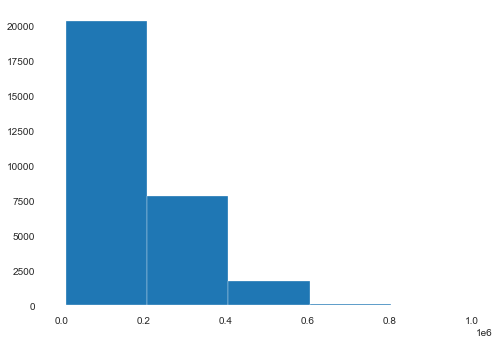

In [12]:
# Histogram

plt.hist(credit_one_w_dummies['LIMIT_BAL'], bins=5)
plt.show()

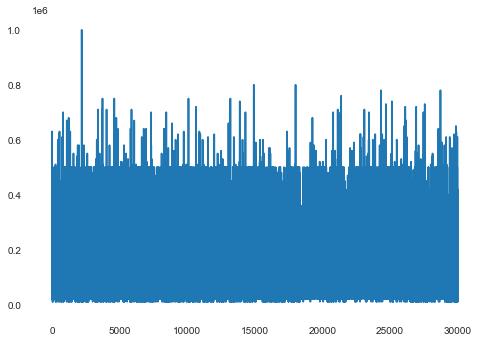

In [13]:
#Line Plot

plt.plot(credit_one_w_dummies['LIMIT_BAL'])
plt.show()

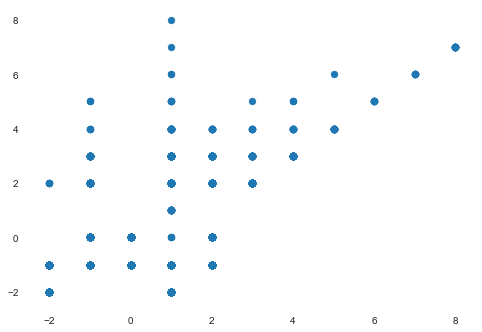

In [14]:
# Scatter Plot
x = credit_one_w_dummies['PAY_0']
y = credit_one_w_dummies['PAY_2']

plt.scatter(x,y)
plt.show()

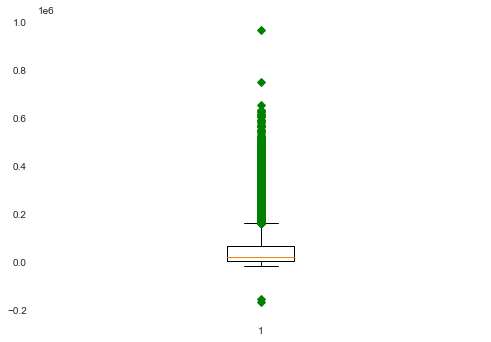

In [15]:
# Boxplot

A = credit_one_w_dummies['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [16]:
# Correlation Matrix

corrMat = credit_one_w_dummies.corr()
print(corrMat)

                                              ID  LIMIT_BAL  MARRIAGE  \
ID                                      1.000000   0.026179 -0.029079   
LIMIT_BAL                               0.026179   1.000000 -0.108139   
MARRIAGE                               -0.029079  -0.108139  1.000000   
AGE                                     0.018678   0.144713 -0.414170   
PAY_0                                  -0.030575  -0.271214  0.019917   
PAY_2                                  -0.011215  -0.296382  0.024199   
PAY_3                                  -0.018494  -0.286123  0.032688   
PAY_4                                  -0.002735  -0.267460  0.033122   
PAY_5                                  -0.022199  -0.249411  0.035629   
PAY_6                                  -0.020270  -0.235195  0.034345   
BILL_AMT1                               0.019389   0.285430 -0.023472   
BILL_AMT2                               0.017982   0.278314 -0.021602   
BILL_AMT3                               0.024354   

In [17]:
# CoVariance

covMat = credit_one_w_dummies.cov()
print(covMat)

                                                  ID     LIMIT_BAL  \
ID                                      7.500250e+07  2.941664e+07   
LIMIT_BAL                               2.941664e+07  1.683446e+10   
MARRIAGE                               -1.314525e+02 -7.323670e+03   
AGE                                     1.491057e+03  1.730767e+05   
PAY_0                                  -2.975726e+02 -3.954593e+04   
PAY_2                                  -1.162770e+02 -4.603765e+04   
PAY_3                                  -1.916922e+02 -4.443225e+04   
PAY_4                                  -2.769132e+01 -4.057181e+04   
PAY_5                                  -2.178600e+02 -3.667056e+04   
PAY_6                                  -2.018774e+02 -3.509308e+04   
BILL_AMT1                               1.236447e+07  2.727020e+09   
BILL_AMT2                               1.108392e+07  2.570130e+09   
BILL_AMT3                               1.462688e+07  2.548533e+09   
BILL_AMT4           

## Look at the data features

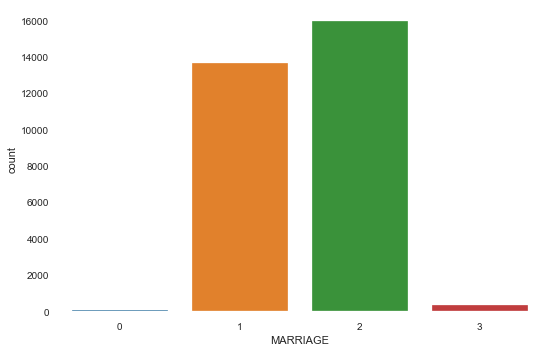

In [21]:
# Distribution of customers by marital status
sns.factorplot('MARRIAGE', data=credit_one_w_dummies, kind='count', aspect=1.5)

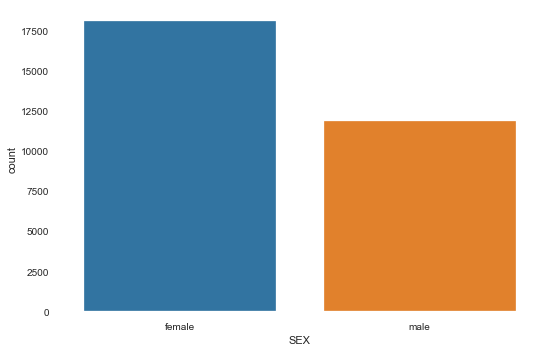

In [22]:
# Distribution of customers by marital status
sns.factorplot('SEX', data=credit_one_clean_data, kind='count', aspect=1.5)

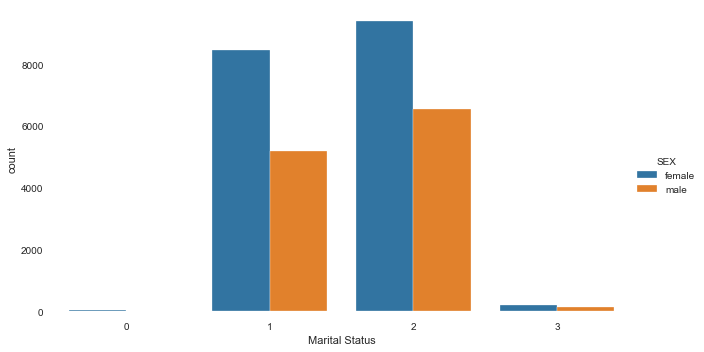

In [24]:
# Use seaborn to group by Sex and Marital Status
g = sns.factorplot('MARRIAGE', data=credit_one_clean_data, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Marital Status')

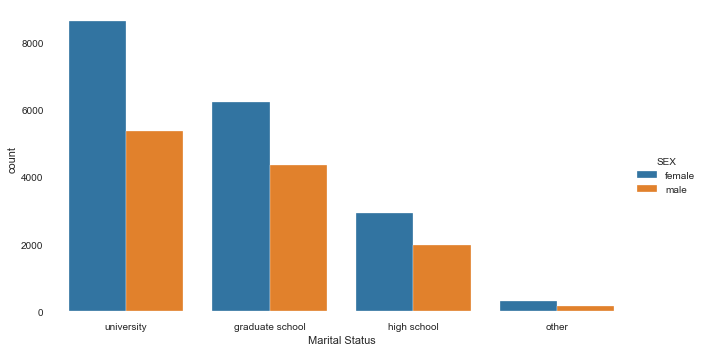

In [25]:
# Use seaborn to group by Sex and Education
g = sns.factorplot('EDUCATION', data=credit_one_clean_data, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Marital Status')

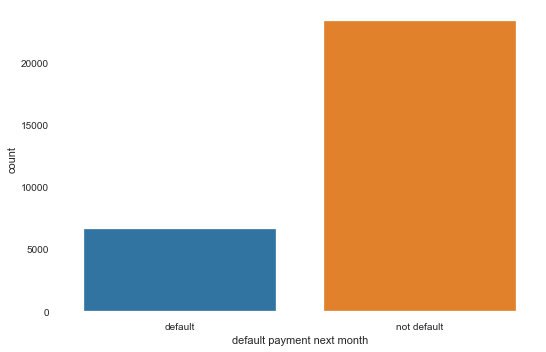

In [26]:
# Distribution of customers who defaulted
sns.factorplot('default payment next month', data=credit_one_clean_data, kind='count', aspect=1.5)

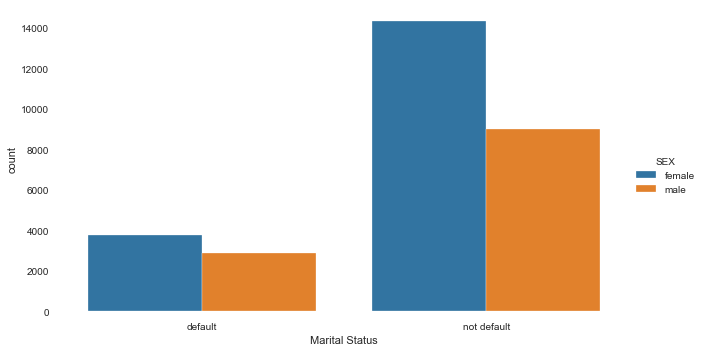

In [27]:
# Use seaborn to group by Sex and default payment
g = sns.factorplot('default payment next month', data=credit_one_clean_data, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('Marital Status')

Text(0.5, 1.0, "Distribution of Customers' Ages")

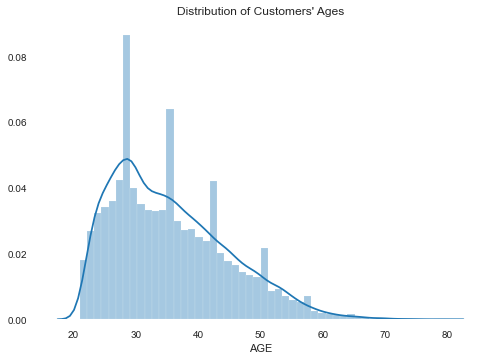

In [40]:
age = credit_one_clean_data['AGE']
# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers' Ages")

In [38]:
# creating a discrete age feature
credit_one_clean_data.drop('AGE_DISC', axis=1)
credit_one_clean_data['AGE_DISC'] = pd.cut(credit_one_clean_data['AGE'], bins=[17,24,34,44,54,64,84], labels=False)
credit_one_clean_data.groupby('AGE_DISC').size()

AGE_DISC
0     2685
1    13011
2     9018
3     4233
4      943
5      110
dtype: int64

Text(0.5, 1.0, "Distribution of Customers' Credit Limit")

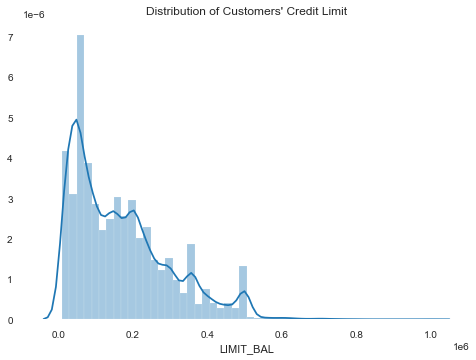

In [46]:
limit = credit_one_clean_data['LIMIT_BAL']
# Distribution of age, with an overlay of a density plot
limit_dist = sns.distplot(limit)
limit_dist.set_title("Distribution of Customers' Credit Limit")

In [52]:
credit_one_clean_data.rename(columns={'default payment next month':'default_status'}, inplace=True)

In [54]:
credit_one_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30000 non-null  float64
 1   LIMIT_BAL       30000 non-null  int64  
 2   SEX             30000 non-null  object 
 3   EDUCATION       30000 non-null  object 
 4   MARRIAGE        30000 non-null  int64  
 5   AGE             30000 non-null  int64  
 6   PAY_0           30000 non-null  int64  
 7   PAY_2           30000 non-null  int64  
 8   PAY_3           30000 non-null  int64  
 9   PAY_4           30000 non-null  int64  
 10  PAY_5           30000 non-null  int64  
 11  PAY_6           30000 non-null  int64  
 12  BILL_AMT1       30000 non-null  int64  
 13  BILL_AMT2       30000 non-null  int64  
 14  BILL_AMT3       30000 non-null  int64  
 15  BILL_AMT4       30000 non-null  int64  
 16  BILL_AMT5       30000 non-null  int64  
 17  BILL_AMT6       30000 non-null 

In [56]:
# Crosstab: Customers who defaulted or not split by Gender and Education
table = pd.crosstab(index=[credit_one_clean_data.default_status,credit_one_clean_data.EDUCATION], columns=[credit_one_clean_data.SEX])
table.unstack()

SEX                     female                                         male  \
EDUCATION      graduate school high school other university graduate school   
default_status                                                                
default                   1130         692    19       1922             906   
not default               5101        2235   279       6734            3448   

SEX                                          
EDUCATION      high school other university  
default_status                               
default                545    14       1408  
not default           1445   156       3966

**Customers with high school, especially male, education seem to have a higher share of defaulters**

In [59]:
# Crosstab: Customers who defaulted or not split by Gender and Age Group
table = pd.crosstab(index=[credit_one_clean_data.default_status, credit_one_clean_data.AGE_DISC], columns=[credit_one_clean_data.SEX])
table.unstack()

SEX            female                            male                         \
AGE_DISC            0     1     2     3    4   5    0     1     2     3    4   
default_status                                                                 
default           498  1560  1049   512  133  11  232  1081   922   501  120   
not default      1412  6511  4222  1838  327  39  543  3859  2825  1382  363   

SEX                 
AGE_DISC         5  
default_status      
default         17  
not default     43

**Younger Customers seem to have a higher share of defaulters**

/Users/shishirpatel/opt/anaconda3/envs/dataScienceCourse1/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


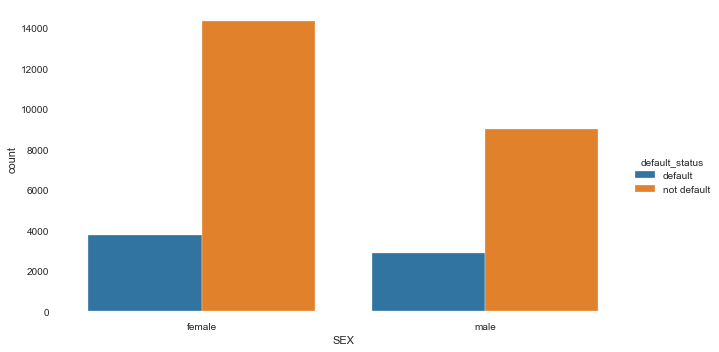

In [60]:
# Use seaborn to group by Sex and default payment
g = sns.factorplot('SEX', data=credit_one_clean_data, hue='default_status', kind='count', aspect=1.75)
g.set_xlabels('SEX')

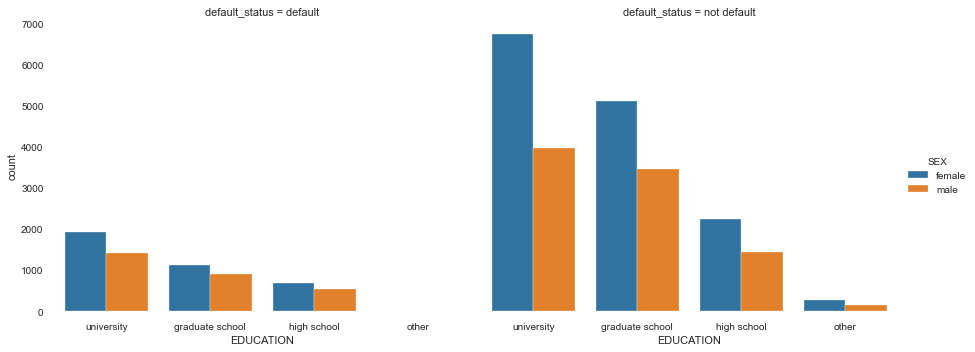

In [62]:
# factorplot of customers splitted into sex, education, and customers split into either defaulted or not
sns.factorplot('EDUCATION', data=credit_one_clean_data, kind='count', hue='SEX', col='default_status', aspect=1.25, size=5)

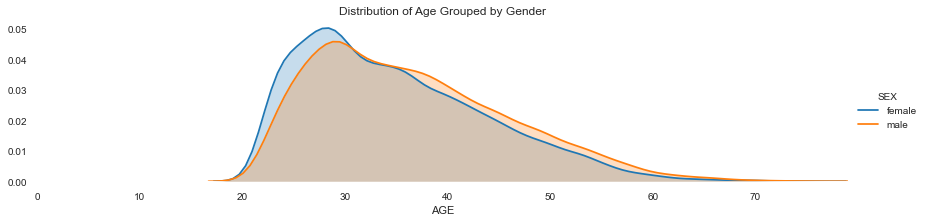

In [63]:
# kde plot, Distribution of Customers' Ages

# Grouped by Gender

fig = sns.FacetGrid(credit_one_clean_data, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit_one_clean_data['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

In [64]:
credit_one_w_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      30000 non-null  float64
 1   LIMIT_BAL                               30000 non-null  int64  
 2   MARRIAGE                                30000 non-null  int64  
 3   AGE                                     30000 non-null  int64  
 4   PAY_0                                   30000 non-null  int64  
 5   PAY_2                                   30000 non-null  int64  
 6   PAY_3                                   30000 non-null  int64  
 7   PAY_4                                   30000 non-null  int64  
 8   PAY_5                                   30000 non-null  int64  
 9   PAY_6                                   30000 non-null  int64  
 10  BILL_AMT1                               30000 non-null  in

In [72]:
data_subset = credit_one_w_dummies.iloc[:,np.r_[0:4,22:30]]

In [70]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      30000 non-null  float64
 1   LIMIT_BAL                               30000 non-null  int64  
 2   MARRIAGE                                30000 non-null  int64  
 3   SEX_female                              30000 non-null  uint8  
 4   SEX_male                                30000 non-null  uint8  
 5   EDUCATION_graduate school               30000 non-null  uint8  
 6   EDUCATION_high school                   30000 non-null  uint8  
 7   EDUCATION_other                         30000 non-null  uint8  
 8   EDUCATION_university                    30000 non-null  uint8  
 9   default payment next month_default      30000 non-null  uint8  
 10  default payment next month_not default  30000 non-null  ui

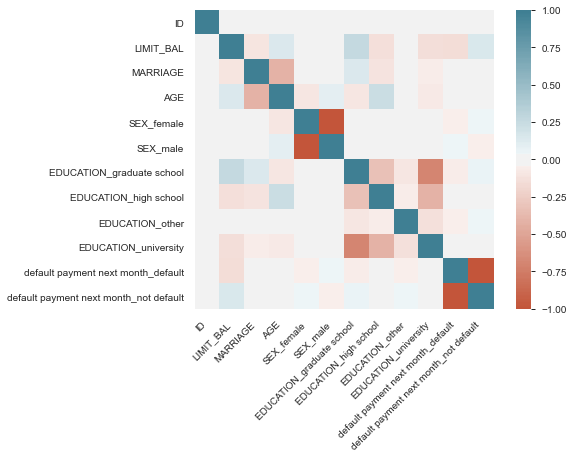

In [73]:
# Correlation HeatMap

corr = data_subset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [78]:
corrMat = data_subset.corr()
print(corrMat)

                                           ID  LIMIT_BAL  MARRIAGE    AGE  \
ID                                      1.000      0.026    -0.029  0.019   
LIMIT_BAL                               0.026      1.000    -0.108  0.145   
MARRIAGE                               -0.029     -0.108     1.000 -0.414   
AGE                                     0.019      0.145    -0.414  1.000   
SEX_female                              0.018      0.025    -0.031 -0.091   
SEX_male                               -0.018     -0.025     0.031  0.091   
EDUCATION_graduate school              -0.026      0.259     0.142 -0.100   
EDUCATION_high school                   0.017     -0.140    -0.111  0.231   
EDUCATION_other                         0.037      0.013    -0.008  0.009   
EDUCATION_university                    0.003     -0.148    -0.052 -0.078   
default payment next month_default     -0.014     -0.154    -0.024  0.014   
default payment next month_not default  0.014      0.154     0.024 -0.014   

In [79]:
covMat = data_subset.cov()
print(covMat)

                                                 ID       LIMIT_BAL  MARRIAGE  \
ID                                     75002500.000    29416640.916  -131.453   
LIMIT_BAL                              29416640.916 16834455682.157 -7323.670   
MARRIAGE                                   -131.453       -7323.670     0.272   
AGE                                        1491.057      173076.723    -1.993   
SEX_female                                   78.356        1571.051    -0.008   
SEX_male                                    -78.356       -1571.051     0.008   
EDUCATION_graduate school                  -107.014       16044.483     0.035   
EDUCATION_high school                        56.025       -6709.315    -0.021   
EDUCATION_other                              39.887         215.785    -0.001   
EDUCATION_university                         11.102       -9550.953    -0.013   
default payment next month_default          -50.152       -8267.552    -0.005   
default payment next month_n

In [76]:
data_subset2 = credit_one_w_dummies.iloc[:,np.r_[0,1,16:22,28,29]]

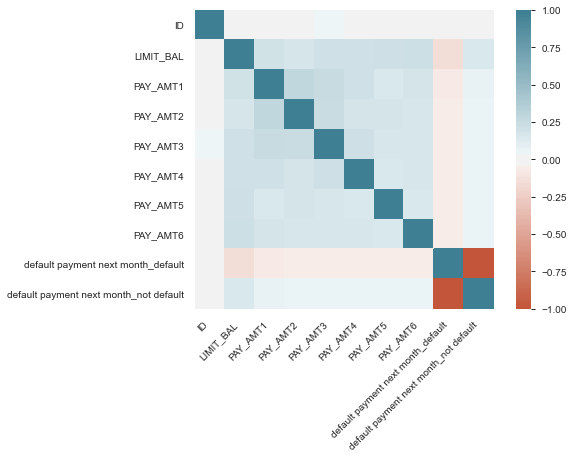

In [77]:
# Correlation Heat Map

corr = data_subset2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [83]:
#credit_one_w_dummies.info() Using map to convert sex to numeric

# Creating a new default column that maps default to 1 and not default to 0 

#credit_one_clean_data.drop('default_status_mapped', axis=1)
credit_one_clean_data['default_status_mapped'] = credit_one_clean_data.default_status.map({'default':1, 'not default':0})

In [84]:
credit_one_clean_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_status,Gender_numeric,AGE_DISC,default_status_mapped
0,1.000,20000,female,university,1,24,2,2,-1,-1,...,0,689,0,0,0,0,default,0,0,1
1,2.000,120000,female,university,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,default,0,1,1
2,3.000,90000,female,university,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,not default,0,1,0
3,4.000,50000,female,university,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,not default,0,2,0
4,5.000,50000,male,university,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,not default,1,4,0


## Factors Affecting the Default

### Age Factor

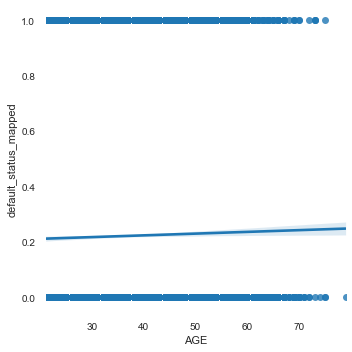

In [85]:
# Linear plot of age vs. defaulter
sns.lmplot('AGE', 'default_status_mapped', data=credit_one_clean_data)

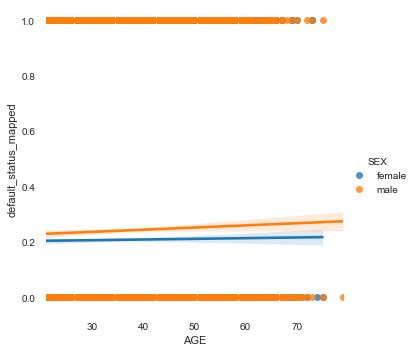

In [86]:
# age vs. defaulter grouped by Sex
sns.lmplot('AGE', 'default_status_mapped', data=credit_one_clean_data, hue='SEX')

The default rate seem to be slightly higher in older people, in both males and females.

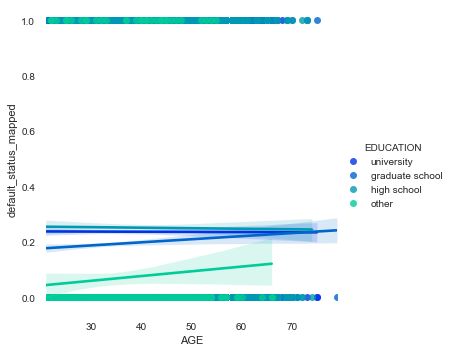

In [89]:
# age vs. defaulter grouped by Sex
sns.lmplot('AGE', 'default_status_mapped', data=credit_one_clean_data, hue='EDUCATION', palette='winter')

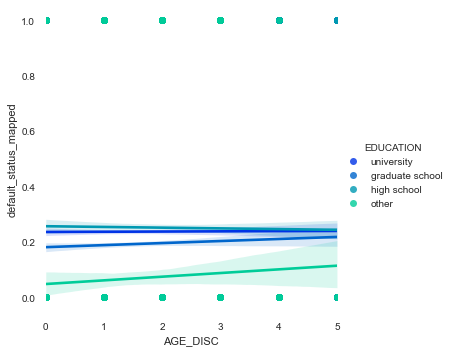

In [92]:
# age (discrete) vs. defaulter grouped by Sex
sns.lmplot('AGE_DISC', 'default_status_mapped', data=credit_one_clean_data, hue='EDUCATION', palette='winter')

/Users/shishirpatel/opt/anaconda3/envs/dataScienceCourse1/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


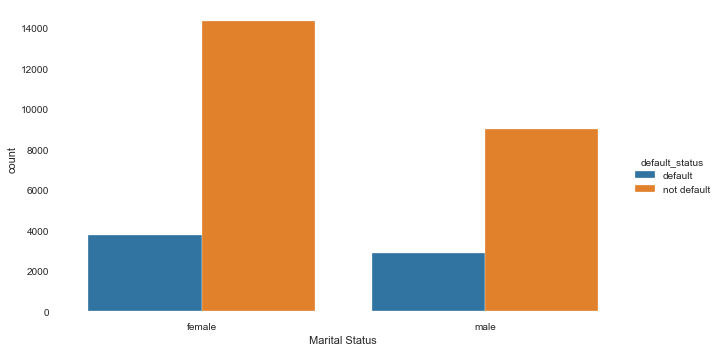

In [99]:
# Use seaborn to group by Sex and default payment
g = sns.factorplot('SEX', data=credit_one_clean_data, hue='default_status', kind='count', aspect=1.75)
g.set_xlabels('Marital Status')

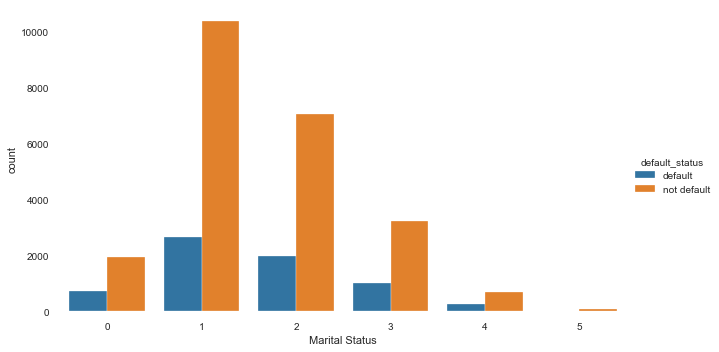

In [100]:
g = sns.factorplot('AGE_DISC', data=credit_one_clean_data, hue='default_status', kind='count', aspect=1.75)
g.set_xlabels('Marital Status')

### Education Factor

/Users/shishirpatel/opt/anaconda3/envs/dataScienceCourse1/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


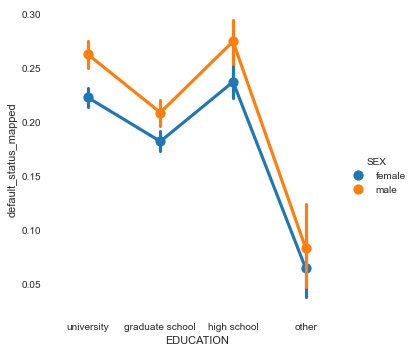

In [93]:
# Defaulters vs. Education Grouped by gender
sns.factorplot('EDUCATION','default_status_mapped', hue='SEX', data=credit_one_clean_data)

From the figure above, males with high school education have a higher default rate

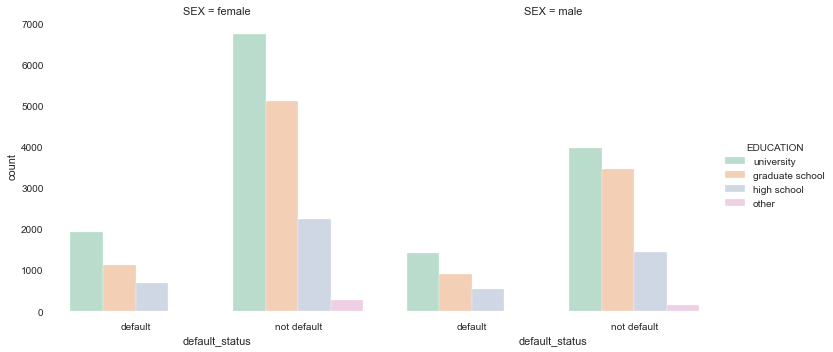

In [97]:
sns.factorplot('default_status', data=credit_one_clean_data, hue='EDUCATION', kind='count', palette='Pastel2',
              col='SEX')